# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Number_of_cities = len(cities)
Number_of_cities

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
  
#city_ejempo=['London','Melbourne','Alaska','Jazan','Caracas','Harare','El Junquito','New Orleans',"GTY77","Maracay","Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in cities:    # cities[:100]: to just do it for 100 rows (City) test
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of {Number_of_cities} |City number: {Req_weather_city['id']}, City name: {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of 620 |City number: 2112309, City name: Katsuura
Processing Record 2 of 620 |City number: 3652764, City name: Puerto Ayora
Processing Record 3 of 620 |City number: 2126199, City name: Cherskiy
Processing Record 4 of 620 |City number: 5855927, City name: Hilo
Processing Record 5 of 620 |City number: 1015776, City name: Bredasdorp
Processing Record 6 of 620 |City number: 343292, City name: Āsosa
Processing Record 7 of 620 |City number: 1863997, City name: Fukuechō
Processing Record 8 of 620 |City number: 3369157, City name: Cape Town
Processing Record 9 of 620 |City number: 3833367, City name: Ushuaia
Processing Record 10 of 620 |City number: 3175096, City name: Laas
Processing Record 11 of 620 |City number: 3466704, City name: Castro
taolanaro: city not found. Skipping...
Processing Record 12 of 620 |City number: 3466165, City name: Cidreira
Processing Record 13 of 620 |City number: 2206894, City name: Hokitika
Processing Record 14 of 620 |City number: 3374210, City

Processing Record 111 of 620 |City number: 2515562, City name: La Rinconada
Processing Record 112 of 620 |City number: 5880054, City name: Barrow
Processing Record 113 of 620 |City number: 3424607, City name: Tasiilaq
Processing Record 114 of 620 |City number: 264878, City name: Ano Mera
Processing Record 115 of 620 |City number: 3141667, City name: Roald
Processing Record 116 of 620 |City number: 1071296, City name: Antalaha
Processing Record 117 of 620 |City number: 4031637, City name: Lavrentiya
Processing Record 118 of 620 |City number: 3670242, City name: San Alberto
Processing Record 119 of 620 |City number: 2012530, City name: Zhigansk
Processing Record 120 of 620 |City number: 2181511, City name: Te Kauwhata
Processing Record 121 of 620 |City number: 3984997, City name: San Quintín
Processing Record 122 of 620 |City number: 1636022, City name: Martapura
Processing Record 123 of 620 |City number: 2264557, City name: Ponta do Sol
Processing Record 124 of 620 |City number: 5887916

Processing Record 220 of 620 |City number: 6541176, City name: Agropoli
mergui: city not found. Skipping...
Processing Record 221 of 620 |City number: 3372472, City name: Vila Franca do Campo
Processing Record 222 of 620 |City number: 1006984, City name: East London
Processing Record 223 of 620 |City number: 1254046, City name: Tura
Processing Record 224 of 620 |City number: 1529102, City name: Ürümqi
Processing Record 225 of 620 |City number: 3526992, City name: Huauchinango
Processing Record 226 of 620 |City number: 1519422, City name: Semey
Processing Record 227 of 620 |City number: 1812728, City name: Dingzhou
Processing Record 228 of 620 |City number: 587590, City name: Ramsi
Processing Record 229 of 620 |City number: 2965471, City name: Claremorris
Processing Record 230 of 620 |City number: 1490796, City name: Strezhevoy
Processing Record 231 of 620 |City number: 1513491, City name: Yangi Marg`ilon
marcona: city not found. Skipping...
illoqqortoormiut: city not found. Skipping...

Processing Record 327 of 620 |City number: 2121025, City name: Srednekolymsk
Processing Record 328 of 620 |City number: 3868707, City name: Valdivia
Processing Record 329 of 620 |City number: 3466980, City name: Caravelas
Processing Record 330 of 620 |City number: 6144312, City name: Sept-Îles
Processing Record 331 of 620 |City number: 1273309, City name: Sasaram
Processing Record 332 of 620 |City number: 1791636, City name: Weinan
Processing Record 333 of 620 |City number: 2063042, City name: Port Hedland
Processing Record 334 of 620 |City number: 5887798, City name: Assiniboia
Processing Record 335 of 620 |City number: 4513583, City name: Hamilton
Processing Record 336 of 620 |City number: 4787534, City name: Sterling
Processing Record 337 of 620 |City number: 7601762, City name: Bairiki Village
Processing Record 338 of 620 |City number: 3372964, City name: Lagoa
Processing Record 339 of 620 |City number: 2022773, City name: Khandyga
warqla: city not found. Skipping...
Processing Rec

Processing Record 437 of 620 |City number: 108410, City name: Riyadh
Processing Record 438 of 620 |City number: 3435910, City name: Buenos Aires
Processing Record 439 of 620 |City number: 601084, City name: Alytus
Processing Record 440 of 620 |City number: 3372760, City name: Praia da Vitória
Processing Record 441 of 620 |City number: 5746545, City name: Portland
Processing Record 442 of 620 |City number: 3601402, City name: Savannah Bight
Processing Record 443 of 620 |City number: 1078446, City name: Amparafaravola
Processing Record 444 of 620 |City number: 2145554, City name: Ulladulla
bolungarvik: city not found. Skipping...
Processing Record 445 of 620 |City number: 4705086, City name: Lamar
Processing Record 446 of 620 |City number: 2953371, City name: Bad Reichenhall
Processing Record 447 of 620 |City number: 2022317, City name: Khor
Processing Record 448 of 620 |City number: 5882953, City name: Aklavik
Processing Record 449 of 620 |City number: 3156980, City name: Florø
Processi

Processing Record 545 of 620 |City number: 905395, City name: Mufulira
Processing Record 546 of 620 |City number: 3445026, City name: Vila Velha
Processing Record 547 of 620 |City number: 2172880, City name: Byron Bay
Processing Record 548 of 620 |City number: 2146268, City name: Toowoomba
Processing Record 549 of 620 |City number: 1488206, City name: Ust'-Ishim
Processing Record 550 of 620 |City number: 1122464, City name: Taywarah
Processing Record 551 of 620 |City number: 2156643, City name: Mount Gambier
Processing Record 552 of 620 |City number: 2126682, City name: Bilibino
Processing Record 553 of 620 |City number: 4149635, City name: Callaway
Processing Record 554 of 620 |City number: 6690296, City name: Saint-Joseph
Processing Record 555 of 620 |City number: 6620339, City name: Karratha
Processing Record 556 of 620 |City number: 161290, City name: Bagamoyo
kuche: city not found. Skipping...
Processing Record 557 of 620 |City number: 5380437, City name: Pacific Grove
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,51.64,54,20,3.44,JP,02/06/2021
1,Puerto Ayora,-0.7393,-90.3518,77.00,93,52,7.40,EC,02/06/2021
2,Cherskiy,68.7500,161.3000,-3.33,81,0,4.70,RU,02/06/2021
3,Hilo,19.7297,-155.0900,74.23,47,40,9.22,US,02/06/2021
4,Bredasdorp,-34.5322,20.0403,66.99,92,95,1.99,ZA,02/06/2021
...,...,...,...,...,...,...,...,...,...
564,Trabzon Province,40.9167,39.8333,53.60,54,0,8.05,TR,02/06/2021
565,Jinxiang,27.4327,120.6062,59.29,80,100,3.62,CN,02/06/2021
566,Bull Savanna,17.8868,-77.5902,73.99,88,9,13.02,JM,02/06/2021
567,Coos Bay,43.3665,-124.2179,48.67,81,90,4.61,US,02/06/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,20.369375,20.989012,48.441476,73.609842,48.432337,8.166432
std,33.552798,90.931057,31.532796,18.850944,41.423560,5.897190
min,-54.800000,-179.166700,-41.190000,7.000000,0.000000,0.160000
25%,-7.966700,-60.145800,28.400000,64.000000,1.000000,3.620000
50%,25.366700,27.849200,59.000000,78.000000,40.000000,6.910000
75%,47.761700,97.522800,73.850000,88.000000,93.000000,11.500000
max,78.218600,179.316700,93.990000,100.000000,100.000000,30.850000


In [6]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] > 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] <= 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [7]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,51.64,54,20,3.44,JP,02/06/2021
1,Puerto Ayora,-0.7393,-90.3518,77.00,93,52,7.40,EC,02/06/2021
2,Cherskiy,68.7500,161.3000,-3.33,81,0,4.70,RU,02/06/2021
3,Hilo,19.7297,-155.0900,74.23,47,40,9.22,US,02/06/2021
4,Bredasdorp,-34.5322,20.0403,66.99,92,95,1.99,ZA,02/06/2021
...,...,...,...,...,...,...,...,...,...
564,Trabzon Province,40.9167,39.8333,53.60,54,0,8.05,TR,02/06/2021
565,Jinxiang,27.4327,120.6062,59.29,80,100,3.62,CN,02/06/2021
566,Bull Savanna,17.8868,-77.5902,73.99,88,9,13.02,JM,02/06/2021
567,Coos Bay,43.3665,-124.2179,48.67,81,90,4.61,US,02/06/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

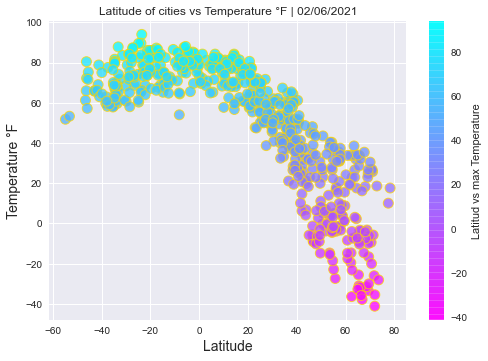

In [8]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
ratio = clean_city_data['Temp'] #[1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 1.28, 1.09, 1.02]
plt.scatter(x, y, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Temperature °F", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs max Temperature')
plt.savefig("output_data/Fig1_Lat_vs_Tem.png")

## Latitude vs. Humidity Plot

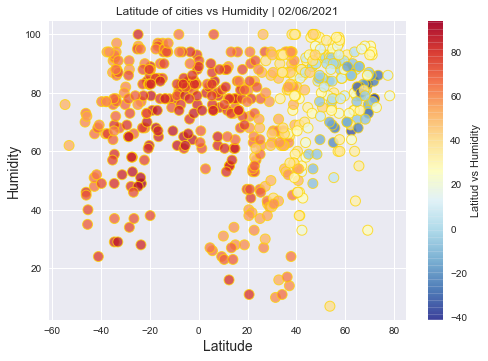

In [9]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x, y, s=100, c=ratio, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')
plt.savefig("output_data/Fig2_Lat_vs_Hum.png")

## Latitude vs. Cloudiness Plot

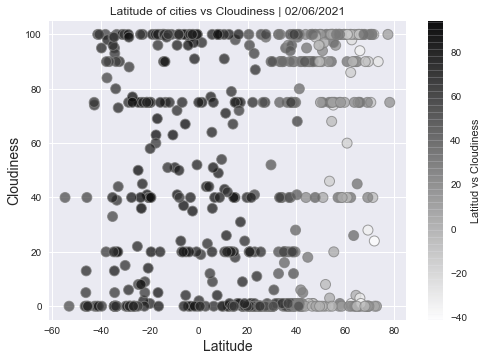

In [10]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x, y, s=100, c=ratio, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')
plt.savefig("output_data/Fig3_Lat_vs_Clou.png")

## Latitude vs. Wind Speed Plot

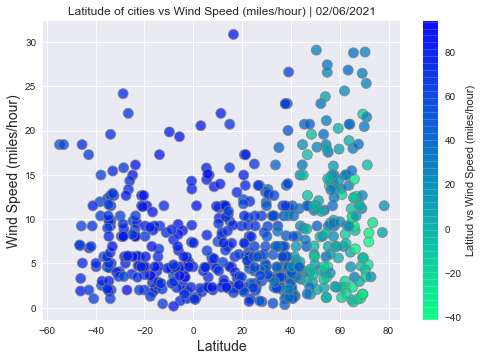

In [11]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x, y, s=100, c=ratio, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar = plt.colorbar()
cbar.set_label(f"Latitud vs Wind Speed (miles/hour)")
plt.savefig("output_data/Fig4_Lat_vs_WS.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

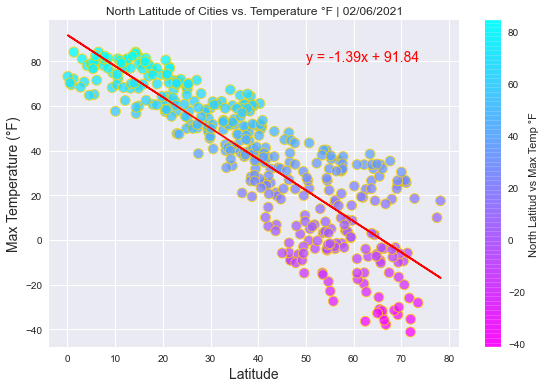

the intercept :91.835
correlation:-0.856
Lat linear regression model :y = -1.39x + 91.84
 I observe that both variables have a very high inverse (negative) correlation based on the value: -0.856, that is -85.6%, which indicates that are inversely proportional, as long as the Latitude decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.


In [12]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Temp']
ratio_Northern = Northern_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,80),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Max Temp °F')
plt.savefig("output_data/Fig5_North_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"===============================================")
print(f" I observe that both variables have a very high inverse (negative) correlation \
based on the value: {correlation_North}, that is {round(correlation_North*100,2)}%, which \
indicates that are inversely proportional, as long as the Latitude \
decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

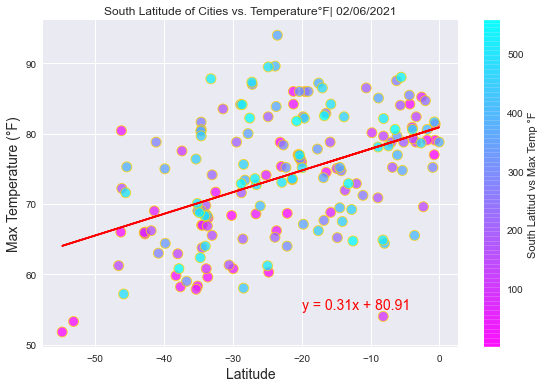

the intercept :80.913
correlation:0.46
Lat linear regression model :y = 0.31x + 80.91
There is a very high correlation based on the value 0.46, that is: 46.0%, which indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), the Temeprature °F also increases, in the same proportion.


In [13]:
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Temp']
ratio_Southern = Southern_city_data['Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,55),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Temperature°F| {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Max Temp °F')
plt.savefig("output_data/Fig6_South_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a very high correlation based on the value {correlation_South}, that is: {round(correlation_South*100,2)}%, which \
indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), \
the Temeprature °F also increases, in the same proportion.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

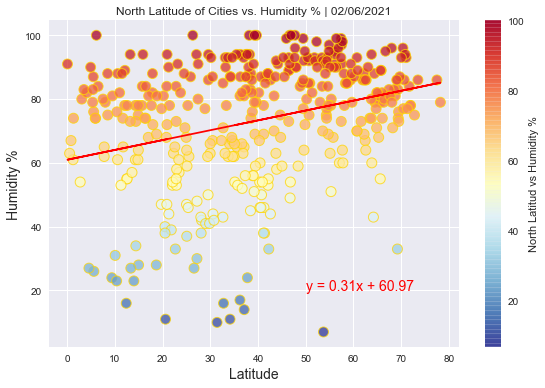

the intercept :60.97
correlation:0.303
Lat linear regression model :y = 0.31x + 60.97
There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, the correlation value is 30.3%, although it is positive, it does not show a trend between both variables


In [14]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Humidity']
ratio_Northern = Northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Humidity %')
plt.savefig("output_data/Fig7_North_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"=============================================")
print(f"There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive, it does not show a trend between both variables")
  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

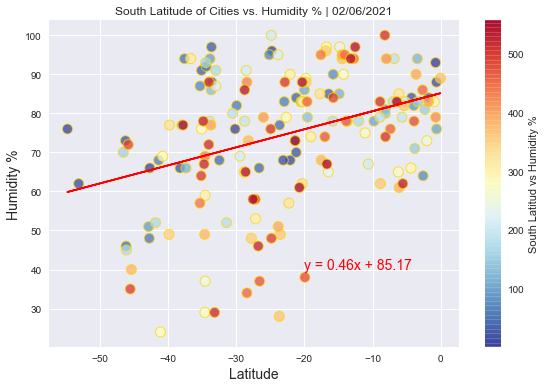

the intercept :85.172
correlation:0.36
Lat linear regression model :y = 0.46x + 85.17
There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, the correlation value is 36.0%, although it is positive, it does not show a trend between both variables


In [15]:
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Humidity']
ratio_Southern = Southern_city_data['Humidity'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Humidity %')
plt.savefig("output_data/Fig8_South_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive, it does not show a trend between both variables")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

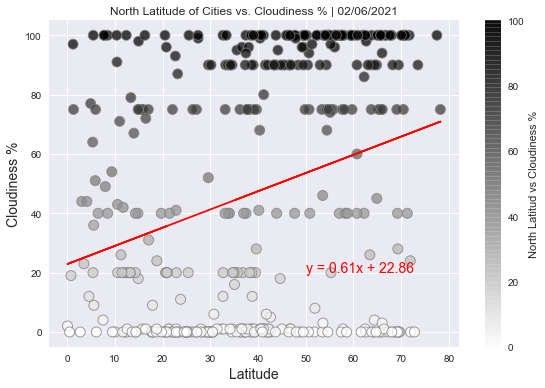

the intercept :22.86
correlation:0.281
Lat linear regression model :y = 0.61x + 22.86
There is an absence of correlation (no correlation) between Latitude and Cloudiness %, the correlation value is 28.1%, although it is positive


In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Cloudiness']
ratio_Northern = Northern_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Cloudiness %')
plt.savefig("output_data/Fig9_North_Lat_vs_Clo_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is an absence of correlation (no correlation) between Latitude and Cloudiness %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

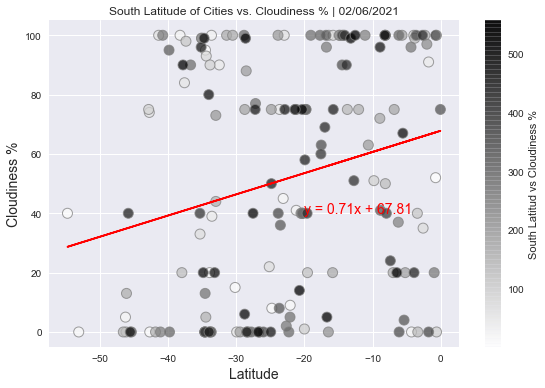

the intercept :67.81
correlation:0.24
Lat linear regression model :y = 0.71x + 67.81
There is no correlation between Latitude and Cloudiness %, the correlation value is 24.0%, although it is positive


In [17]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Cloudiness']
ratio_Southern = Southern_city_data['Cloudiness'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Cloudiness %')
plt.savefig("output_data/Fig10_South_Lat_vs_Clo_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is no correlation between Latitude and Cloudiness %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

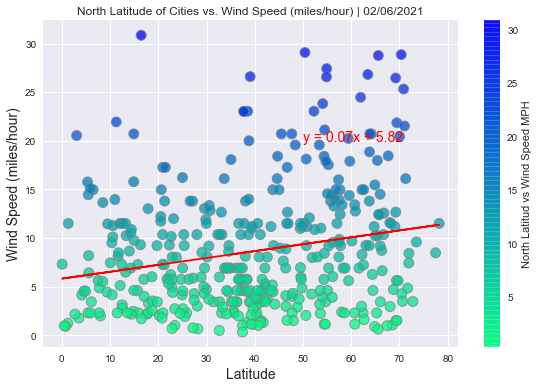

the intercept :5.82
correlation:0.218
Lat linear regression model :y = 0.07x + 5.82
There is a low correlation between latitude and wind speed, the correlation value is 21.8%, although it is positive Looking at the graph and the agglomeration of the points, it seems that there is a marked correlation, but analyzing the regression line, this correlation is low, denoting that if the latitude separates from the equator, the wind is moderately rising.


In [23]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Wind Speed']
ratio_Northern = Northern_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed (miles/hour)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Wind Speed MPH')
plt.savefig("output_data/Fig11_North_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is a low correlation between latitude and wind speed, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive \
Looking at the graph and the agglomeration of the points, it seems that there is a marked \
correlation, but analyzing the regression line, this correlation is low, \
denoting that if the latitude separates from the equator, the wind is moderately rising.")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

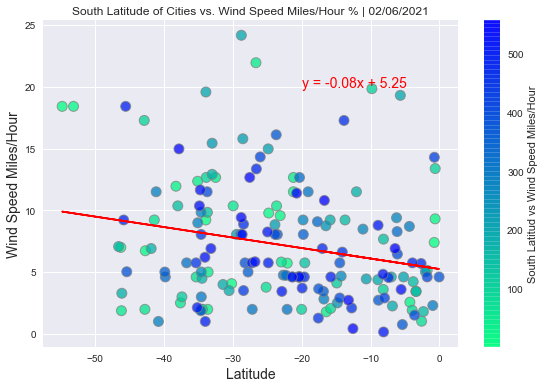

the intercept :5.253
correlation:-0.23
Lat linear regression model :y = -0.08x + 5.25
There is a low correlation between latitude and wind speed, the correlation value is -23.0%, is negative, the low correlation suggests that as you approach zero latitude, the equator, the wind speed decreases very slowly.


In [25]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Wind Speed']
ratio_Southern = Southern_city_data['Wind Speed'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,20),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Wind Speed Miles/Hour % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed Miles/Hour", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Wind Speed Miles/Hour')
plt.savefig("output_data/Fig12_South_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a low correlation between latitude and wind speed, \
the correlation value is {round(correlation_South*100,2)}%, is negative, \
the low correlation suggests that as you approach zero latitude, the equator, \
the wind speed decreases very slowly.")
 